# Advices before start an analysis

1) First define the objetive (becaus you can do a lot of differents things with data, and some of them do not add value to project (or some of them are harder to get)).

2) You need to ensure you have the appropiate data (for example, data to use to do predictions)

# Load libraries

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use("bmh")

# Load data

In [2]:
# read excel file
# Almost all files are in this format (or maybe .csv)
df = pandas.read_excel("Folds5x2_pp.xlsx")

# display first rows of dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Basic information and stats of dataset
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Clean up data

In [4]:
# remove nan values
display("Is nan: ", df.isna().sum())

'Is nan: '

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
# null values
df.isnull().values.any()

False

# Analyzing correlations

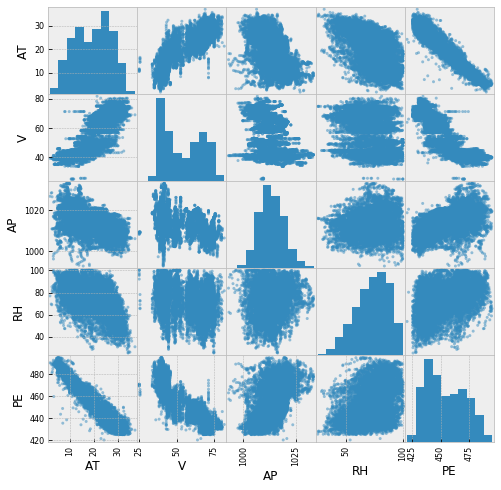

In [6]:
# load specific function
from pandas.plotting import scatter_matrix

# display the scatter matrix
scatter_matrix(df, diagonal="hist", figsize = (8, 8));

## Data analysis
- To know the variables distribution is important and it uses to be the first step in data analysis.
- Check the relation betweens differents variables

# Machine Learning models

In [7]:
# Format data

# Get the independt variables
X = df.loc[:, ["AT", "V", "AP", "RH"]]

# Get the predictor (or dependent variable)
y = df.loc[:, ["PE"]]

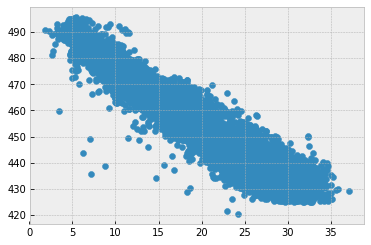

In [9]:
# plot some variables
# for check the data is correct
fig, ax = plt.subplots()
ax.scatter(X.loc[:, "AT"], y)

# Linear regression (Supervised learning)

# Univariate linear regressor
f(x) = a*x_1 + b

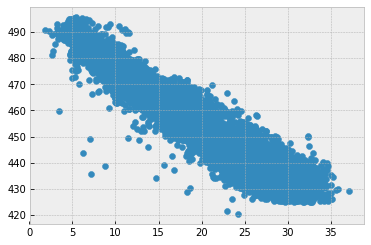

In [11]:
# data to train (select variables)
# variables: "AT", "V", "AP", "RH"
X_train = X.loc[:, ["AT"]]
# print("Dataframe shape: ", X_train.shape)

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

In [12]:
# load function to linear regression
from sklearn.linear_model import LinearRegression

# Define model
regressor = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# get R2 score
# the more close to 1 is, the better the model fit the data
regressor.score(X_train, y)

0.8989475964148236

In [14]:
# intercept model parameter
regressor.intercept_

array([497.03411989])

In [15]:
# parameters (or weights) of the model (related with independent variables)
regressor.coef_

array([[-2.17131996]])

Linear Regressor: 

- PE = 344.07 - 2.17 * AT 
- R2 score: 0.89

# Plot the linear regressor on data 
This only works for univariate linear regression

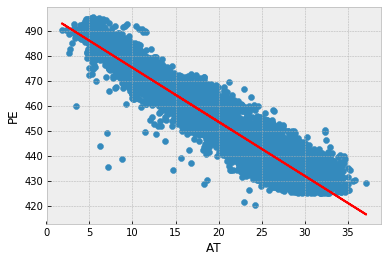

In [17]:
# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

ax.set_xlabel("AT")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_train, regressor.intercept_[0] + regressor.coef_[0]*X_train, c = "r")

# Predictions with linear regression

In [21]:
# write a value for the independent variable
independent_variable = 25

# do the prediction
prediction = regressor.predict(numpy.array([[independent_variable]]))

print("prediction: ", prediction[0][0])

prediction:  442.7511209298219


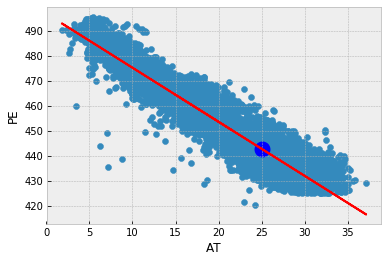

In [22]:
# Plot predictions

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

# set legend to labels
ax.set_xlabel("AT")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_train, regressor.intercept_[0] + regressor.coef_[0]*X_train, c = "r")

# plot prediction
ax.scatter(independent_variable, prediction, c = "b", lineWidth = 10)

# Important things to know
- In real projects, you have to split the data on training / validation / testing to validate if the model is generalizing.
- In real projects there are metrics to validate if the model is working well. Some of them are precision, accuracy, F1 score (For classification). In this case we are using R2

# Multivariate linear regressor
f(x) = a*x_1 + b*x_2 + c

f(x) = a*x_1 + b*x_2 + c*x_3 + d ...

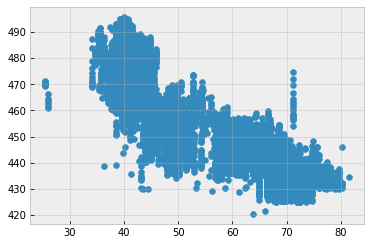

In [24]:
# data to train (select variables)
# variables: "AT", "V", "AP", "RH"
X_train = X.loc[:, ["AT", "V"]]
# print("Dataframe shape: ", X_train.shape)

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train.loc[:, "V"], y)

In [26]:
# load function to linear regression
from sklearn.linear_model import LinearRegression

# Define model
regressor = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# get R2 score
# the more close to 1 is, the better the model fit the data
regressor.score(X_train, y)

0.9157294412114197

In [29]:
# intercept model parameter
regressor.intercept_

array([505.47743382])

In [30]:
# parameters (or weights) of the model (related with independent variables)
regressor.coef_

array([[-1.70426591, -0.32448652]])

Linear Regressor: 

- PE = 344.07 - 2.17 * AT - 0.32 * V
- R2 score: 0.91

# Predictions with linear regression
We cant plot because its more than 2 or 3 dimensions

In [33]:
# write a value for the independent variable
independent_variable_1 = 25
independent_variable_2 = 400

variables = numpy.array([[independent_variable_1, independent_variable_2]])

# do the prediction
prediction = regressor.predict(numpy.array(variables))

print("prediction: ", prediction[0][0])

prediction:  333.07617968427803


# PCA (Unsupervised Learning)
Without labels, only analyzing the data itself

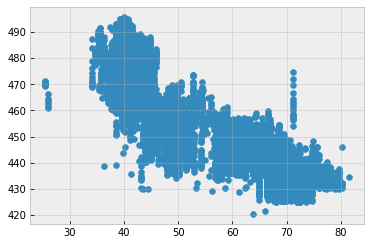

In [38]:
# data to train (select variables)
# variables: "AT", "V", "AP", "RH"
X_train_PCA = X
# print("Dataframe shape: ", X_train.shape)

# plot variables
# only for check
fig, ax = plt.subplots()
ax.scatter(X_train_PCA.loc[:, "V"], y)

# Reducing to 1 variable (1 PCA)

In [146]:
# load library
# link to library: https://scikit-learn.org/
from sklearn.decomposition import PCA

# Define model

# define number of principal components (new dimension of data (reduced))
n_components = 1

pca = PCA(n_components = n_components, svd_solver='full')

# train model
# note that it does not need the target (unsupervised learning)
pca.fit(X_train_PCA)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [147]:
# explained variance
print(pca.explained_variance_ratio_)

[0.62989873]


Text(0, 0.5, 'Variance explained')

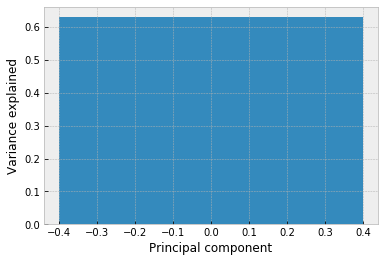

In [148]:
# Plotting explained variance
fig, ax = plt.subplots()
ax.bar(numpy.arange(n_components), pca.explained_variance_ratio_)
ax.set_xlabel("Principal component")
ax.set_ylabel("Variance explained")

In [149]:
# transform the original data to the new dimension (to get the PCA)
X_transform = pca.transform(X_train_PCA)

In [150]:
# Check the original data shape
X_train_PCA.shape

(9568, 4)

In [151]:
# check the new data shape (with new dimensions)
X_transform.shape

(9568, 1)

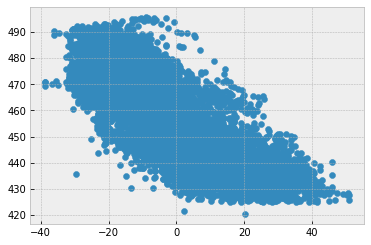

In [152]:
# plot variables
# this is working with only 1 PC
fig, ax = plt.subplots()
ax.scatter(X_transform, y)

# Fit a linear regression with PC

In [153]:
X_transform.shape

(9568, 1)

In [154]:
# Define model
regressor_PCA = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor_PCA.fit(X_transform, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Do predictions
It cant plot because of dimensions

In [155]:
# write a value for the independent variable
independent_variable_PCA = 20

# do the prediction
prediction_PCA = regressor_PCA.predict(numpy.array([[independent_variable_PCA]]))

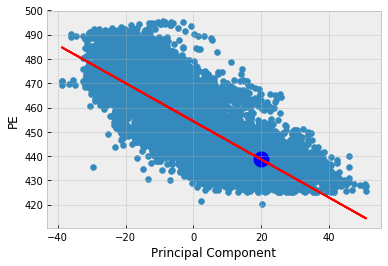

In [156]:
# Plot predictions

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_transform, y)

# set legend to labels
ax.set_xlabel("Principal Component")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_transform, regressor_PCA.intercept_[0] + regressor_PCA.coef_[0]*X_transform, c = "r")

# plot prediction
ax.scatter(independent_variable_PCA, prediction_PCA, c = "b", lineWidth = 10)

In [131]:
# get R2 score
regressor_PCA.score(X_transform, y)

0.6217090146781141

# Reducing to more than 1 variable (more than 1 PCA)

In [132]:
# load library
# link to library: https://scikit-learn.org/
from sklearn.decomposition import PCA

# Define model

# define number of principal components (new dimension of data (reduced))
n_components = 2

pca = PCA(n_components = n_components, svd_solver='full')

# train model
# note that it does not need the target (unsupervised learning)
pca.fit(X_train_PCA)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [133]:
# explained variance
print(pca.explained_variance_ratio_)

[0.62989873 0.29283616]


Text(0, 0.5, 'Variance explained')

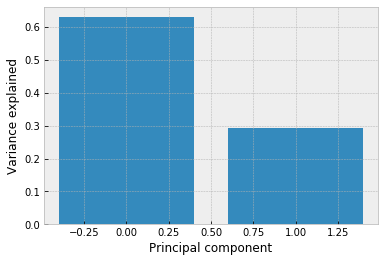

In [134]:
# Plotting explained variance
fig, ax = plt.subplots()
ax.bar(numpy.arange(n_components), pca.explained_variance_ratio_)
ax.set_xlabel("Principal component")
ax.set_ylabel("Variance explained")

In [135]:
# transform the original data to the new dimension (to get the PCA)
X_transform = pca.transform(X_train_PCA)

In [136]:
# Check the original data shape
X_train_PCA.shape

(9568, 4)

In [137]:
# check the new data shape (with new dimensions)
X_transform.shape

(9568, 2)

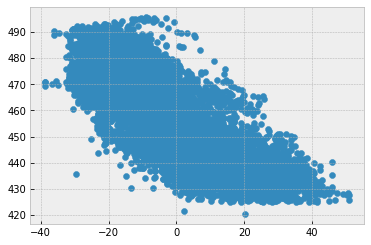

In [139]:
# plot variables
# this is working with only 1 PC
fig, ax = plt.subplots()
ax.scatter(X_transform[:, 0], y)

# Fit a linear regression with PC

In [140]:
# Define model
regressor_PCA = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor_PCA.fit(X_transform, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Do predictions

In [141]:
# write a value for the independent variable
independent_variable_PCA_1 = 20
independent_variable_PCA_2 = 20

variables = numpy.array([[independent_variable_PCA_1, independent_variable_PCA_2]])

# do the prediction
prediction_PCA = regressor_PCA.predict(variables)

print("Prediction: ", prediction_PCA[0][0])

Prediction:  452.5639798427484


In [144]:
# get R2 score
regressor_PCA.score(X_transform, y)

0.8482970166710874